In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
## Link to dataset - https://www.kaggle.com/datasets/aravindrajpalepu/tesla-used-cars/

df = pd.read_csv("tslaUsedCarsInventoryDataSet.csv")
df.head()

,model,year,odometer,price,location,driveTrain,DAS,accident_history,paintJob,wheels,emi,zipCode,interior,state
0,Model S,2018.0,36438.0,53300.0,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",$824 /mo,85209,Cream Premium Interior,CA
1,Model S,2018.0,30180.0,59200.0,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",$930 /mo,85209,Black Premium Interior,CA
2,Model S,2018.0,95696.0,36100.0,"Scottsdale, AZ",100D Long Range All-Wheel Drive,Enhanced Autopilot,No Reported Accidents/Damage,Midnight Silver Metallic Paint,"19"" Sonic Carbon Slipstream Wheels",$514 /mo,85209,Black Premium Interior,AZ
3,Model S,2018.0,36438.0,53300.0,"Colma, CA",100D Long Range All-Wheel Drive,Autopilot,Previously Repaired,Red Multi-Coat Paint,"19"" Silver Slipstream Wheels",$824 /mo,85251,Cream Premium Interior,CA
4,Model S,2018.0,30180.0,59200.0,"Colma, CA",100D Long Range All-Wheel Drive,Previously Repaired,30-Day Premium Connectivity Trial,Midnight Silver Metallic Paint,"21"" Sonic Carbon Twin Turbine Wheels",$930 /mo,85251,Black Premium Interior,CA


In [3]:
columns = list(df.columns)
print("Variables in the data are: ")
print(columns)

Variables in the data are: 
['model', 'year', 'odometer', 'price', 'location', 'driveTrain', 'DAS', 'accident_history', 'paintJob', 'wheels', 'emi', 'zipCode', 'interior', 'state']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1912 entries, 0 to 1911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             1912 non-null   object 
 1   year              232 non-null    float64
 2   odometer          1912 non-null   float64
 3   price             1912 non-null   float64
 4   location          1864 non-null   object 
 5   driveTrain        1869 non-null   object 
 6   DAS               1912 non-null   object 
 7   accident_history  1912 non-null   object 
 8   paintJob          1912 non-null   object 
 9   wheels            1912 non-null   object 
 10  emi               1912 non-null   object 
 11  zipCode           1912 non-null   int64  
 12  interior          1912 non-null   object 
 13  state             1864 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 209.2+ KB


In [5]:
df.isnull().sum()

model                  0
year                1680
odometer               0
price                  0
location              48
driveTrain            43
DAS                    0
accident_history       0
paintJob               0
wheels                 0
emi                    0
zipCode                0
interior               0
state                 48
dtype: int64

In [6]:
dfNum=df[["year","odometer","price","emi","zipCode"]]
dfCat=df[["model","location","driveTrain","DAS","accident_history","paintJob","wheels","interior","state"]]

In [7]:
dfCat.astype('category').describe().T

,count,unique,top,freq
model,1912,4,Model Y,597
location,1864,79,"Walnut, CA",416
driveTrain,1869,23,Model Y Long Range All-Wheel Drive,361
DAS,1912,4,Autopilot,997
accident_history,1912,3,No Reported Accidents/Damage,1713
paintJob,1912,10,Pearl White Paint,565
wheels,1912,21,18’’ Aero Wheels,455
interior,1912,15,All Black Premium Interior,726
state,1864,18,CA,786


In [8]:
df.describe()

,year,odometer,price,zipCode
count,232.0,1912.000000,1912.000000,1912.000000
mean,2018.0,30374.755753,45444.246862,88908.178870
std,0.0,16407.869396,11533.143755,3962.972473
min,2018.0,131.000000,26500.000000,85209.000000
25%,2018.0,18065.000000,36900.000000,85260.000000
50%,2018.0,28591.000000,43900.000000,85704.000000
75%,2018.0,38470.250000,52100.000000,93311.000000
max,2018.0,95696.000000,86200.000000,95403.000000


In [9]:
odometer_Q1 = 18065.000
odometer_Q3 = 38470.250
odometer_IQR = odometer_Q3 - odometer_Q1
print(f"IQR for 'odometer': {odometer_IQR}")  # Odometer IQR

price_Q1 = 36900.000
price_Q3 = 52100.000
price_IQR = price_Q3 - price_Q1
print(f"IQR for 'price': {price_IQR}")  # Price IQR

IQR for 'odometer': 20405.25
IQR for 'price': 15200.0


In [10]:
odometer_low_outlier_threshold = odometer_Q1 - 1.5 * odometer_IQR
print("Low odometer outlier threshold: ")
print(odometer_low_outlier_threshold)
odometer_high_outlier_threshold = odometer_Q3 + 1.5 * odometer_IQR
print("High odometer outlier threshold: ")
print(odometer_high_outlier_threshold)

Low odometer outlier threshold: 
-12542.875
High odometer outlier threshold: 
69078.125


<Axes: xlabel='odometer'>

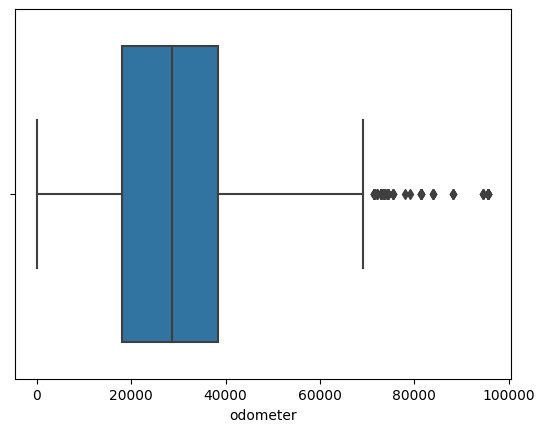

In [11]:
sns.boxplot(x='odometer', data=df)  # Boxplot identifying if there are possible outliers

In [12]:
price_low_outlier_threshold = price_Q1 - 1.5 * price_IQR
print("Low price outlier threshold: ")
print(price_low_outlier_threshold)
price_high_outlier_threshold = price_Q3 + 1.5 * price_IQR
print("High price outlier threshold: ")
print(price_high_outlier_threshold)

Low price outlier threshold: 
14100.0
High price outlier threshold: 
74900.0


<Axes: xlabel='price'>

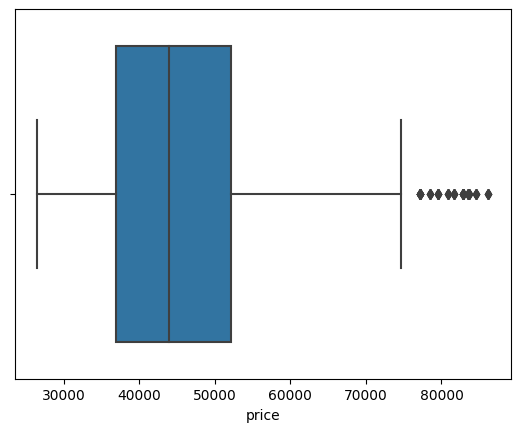

In [13]:
sns.boxplot(x='price', data=df) # Boxplot identifying if there are possible outliers

<Axes: xlabel='odometer', ylabel='price'>

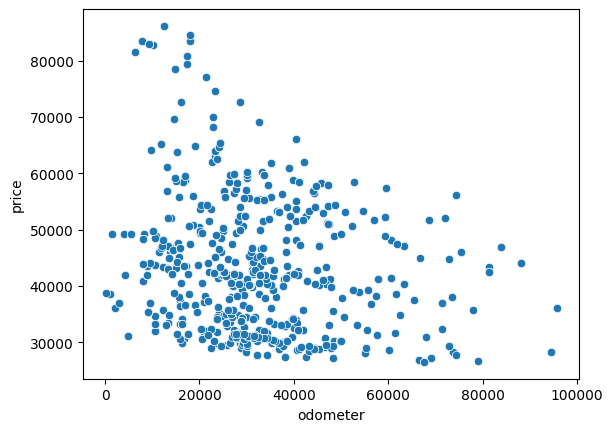

In [14]:
sns.scatterplot(x='odometer', y='price', data=df)  # Scatterplot comparing odometer and price

In [15]:
# Remove outliers from 'odometer' and 'price' columns
remove_odometer_price_outliers = df[(df['odometer'] <= odometer_high_outlier_threshold) & (df['price'] <= price_high_outlier_threshold)]

# Verify the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", remove_odometer_price_outliers.shape)

Shape of DataFrame after removing outliers: (1791, 14)


<Axes: xlabel='odometer'>

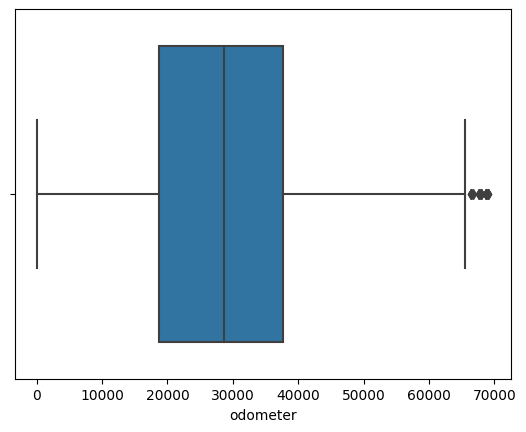

In [16]:
# Boxchart showing outliers removed from odometer

sns.boxplot(x='odometer', data=remove_odometer_price_outliers)

<Axes: xlabel='price'>

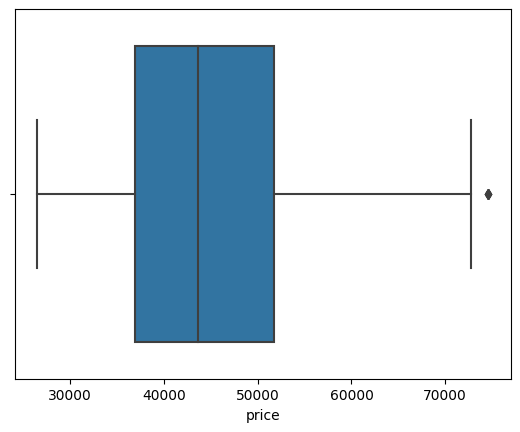

In [17]:
# Boxchart showing outliers removed from price
sns.boxplot(x='price', data=remove_odometer_price_outliers)

<Axes: xlabel='odometer', ylabel='price'>

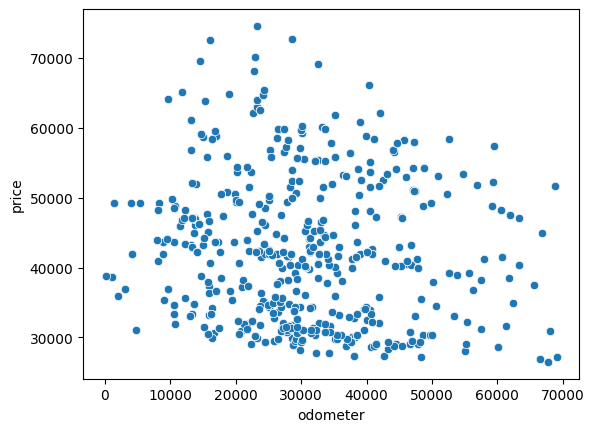

In [18]:
sns.scatterplot(x='odometer', y='price', data=remove_odometer_price_outliers)  # Scatterplot comparing odometer and price after outlier removal

In [19]:
unique_values_all_columns = df.nunique()
print(unique_values_all_columns)

model                 4
year                  1
odometer            450
price               262
location             79
driveTrain           23
DAS                   4
accident_history      3
paintJob             10
wheels               21
emi                 258
zipCode              11
interior             15
state                18
dtype: int64


In [20]:
# Get unique values in each of the Objects

# Create the dictionary
unique_values_dict = {col: dfCat[col].unique().tolist() for col in dfCat.columns}

for key in unique_values_dict:
    print(f"{key}: {unique_values_dict[key]}")

model: ['Model S', 'Model X', 'Model Y', 'Model 3']
location: ['Colma, CA', 'Scottsdale, AZ', 'Available to view in Lisle, IL', 'Elk Grove Village, IL', 'Jacksonville, FL', 'Orlando, FL', 'FORT MYERS, FL', 'Available to view in Owings Mills, MD', 'RENTON, WA', 'Rockville, MD', 'Available to view in ROCKVILLE, MD', 'Lawrence Township, NJ', 'Savannah, GA', 'Franklin, TN', 'Rogers, MN', 'Available to view in Vienna, VA', 'BOSTON, MA', 'Lisle, IL', 'Bartlett, TN', nan, 'Available to view in Colma, CA', 'Dedham, MA', 'Orland Park, IL', 'Fort Lauderdale, FL', 'Libertyville, IL', 'Matthews, NC', 'Walnut, CA', 'Vienna, VA', 'Available to view in Decatur, GA', 'CHERRY HILL, NJ', 'Available to view in Roswell, GA', 'Temecula, CA', 'Roswell, GA', 'Available to view in UPLAND, CA', 'Decatur, GA', 'Paramus, NJ', 'PARAMUS, NJ', 'Available to view in Tampa, FL', 'Available to view in Maplewood, MN', 'Fort Myers, FL', 'Available to view in RENTON, WA', 'LONG BEACH, CA', 'Available to view in Lawrence 

In [21]:
# As we have redundancy between location, state, and zipcode, dropping one allows better management of the dataset. For our purposes, removing location as its split into (city,state) is the best choice.

df = df.drop(columns=['location'])

# Verify that the 'location' column has been dropped
print("Columns after dropping 'location':")
print(df.columns)

Columns after dropping 'location':
Index(['model', 'year', 'odometer', 'price', 'driveTrain', 'DAS',
       'accident_history', 'paintJob', 'wheels', 'emi', 'zipCode', 'interior',
       'state'],
      dtype='object')


In [22]:
# Remove the 43 missing values from driveTrain as we can not know which type the vehicle has, therefore that data is unuseable.

df2 = remove_odometer_price_outliers.dropna(subset=['driveTrain'])
print("Shape of DataFrame after removing NaN in 'driveTrain':", df2.shape)

#df2 is update dataframe with removed outliers in price, odometer, and driveTrain.

Shape of DataFrame after removing NaN in 'driveTrain': (1777, 14)


In [23]:
# Update all "nan" in year with 2018. We could drop the year as it is missing the vast majority of years, however since all others are 2018, we can assume all vehicles are from 2018 for purposes of this dataset.
df2.loc[:, 'year'].fillna(2018, inplace=True)

# Verify that NaN values are replaced
print(df2['year'].isnull().sum())

0


<ipython-input-23-b11480a6c435>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'year'].fillna(2018, inplace=True)


In [24]:
# Define state mapping for zipcodes
zipcode_map = {85209: "IL",85251:"CA",85254:"AZ",85260:"AZ",85305:"AZ",85704:"AZ",91801:"CA",95403:"CA",85281:"AZ",91301:"CA",93311:"IL"}

# Fill na states using map
df2['state'] = df2['state'].fillna(df2['zipCode'].map(zipcode_map))

# Confirm missing values filled
print(df2['state'].isnull().sum())

0


<ipython-input-24-67eea548661c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['state'] = df2['state'].fillna(df2['zipCode'].map(zipcode_map))


In [25]:

df2 = df2.drop(columns=['location'])

# Verify that the 'location' column has been dropped
print("Columns after dropping 'location':")
print(df2.columns)

Columns after dropping 'location':
Index(['model', 'year', 'odometer', 'price', 'driveTrain', 'DAS',
       'accident_history', 'paintJob', 'wheels', 'emi', 'zipCode', 'interior',
       'state'],
      dtype='object')


In [ ]:
df2.isnull().sum()

model               0
year                0
odometer            0
price               0
driveTrain          0
DAS                 0
accident_history    0
paintJob            0
wheels              0
emi                 0
zipCode             0
interior            0
state               0
dtype: int64

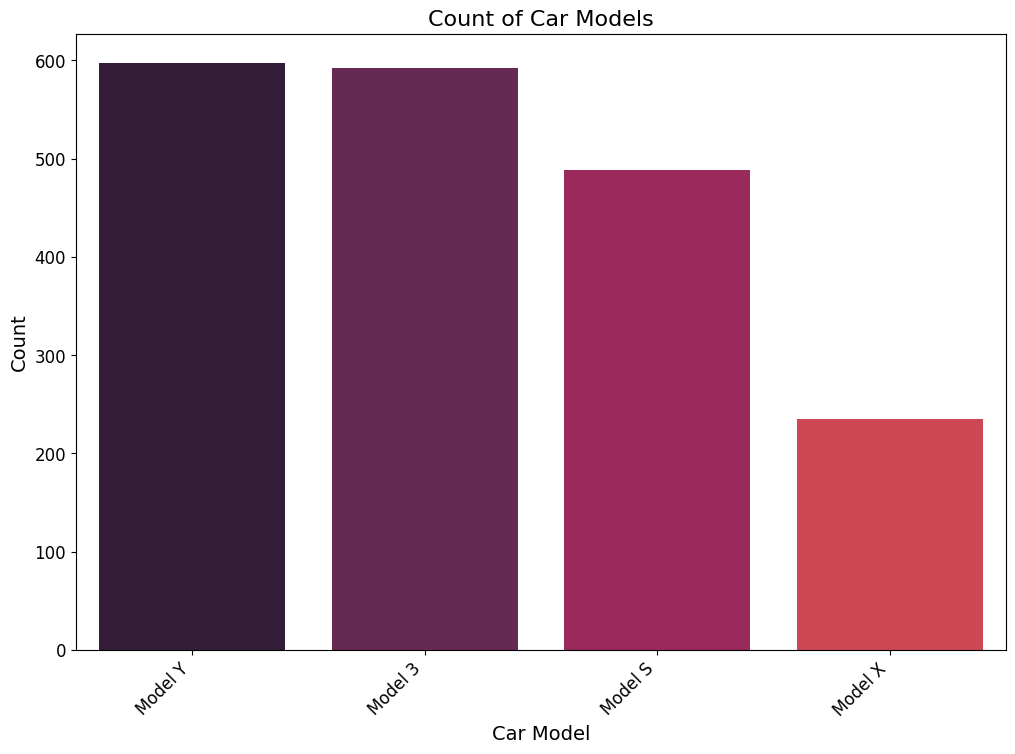

In [26]:
# using seaborn's 'color_palette'
custom_palette = sns.color_palette("rocket")
plt.figure(figsize=(12, 8))
model_counts = df['model'].value_counts()
order = model_counts.index

# Use the chosen color palette and add 'dodge' for better grouping
sns.countplot(x='model', data=df, order=order, palette=custom_palette, dodge=True)

# Set title and labels
plt.title('Count of Car Models', fontsize=16)
plt.xlabel('Car Model', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add visual hierarchy by setting the y-axis label font size
plt.yticks(fontsize=12)

# Show the plot
plt.show()

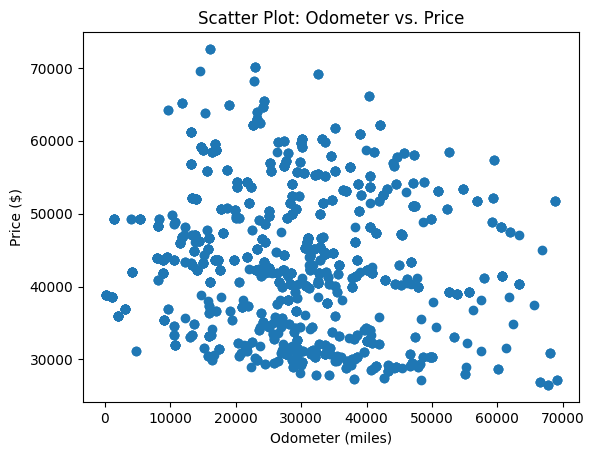

In [ ]:
plt.scatter(df2['odometer'], df2['price'])
plt.title('Scatter Plot: Odometer vs. Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.show()


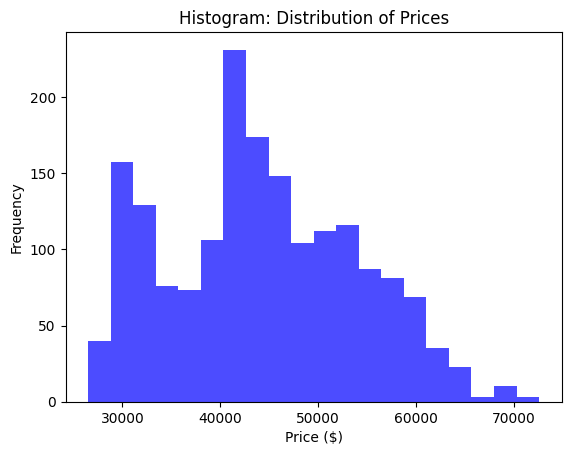

In [ ]:
plt.hist(df2['price'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram: Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

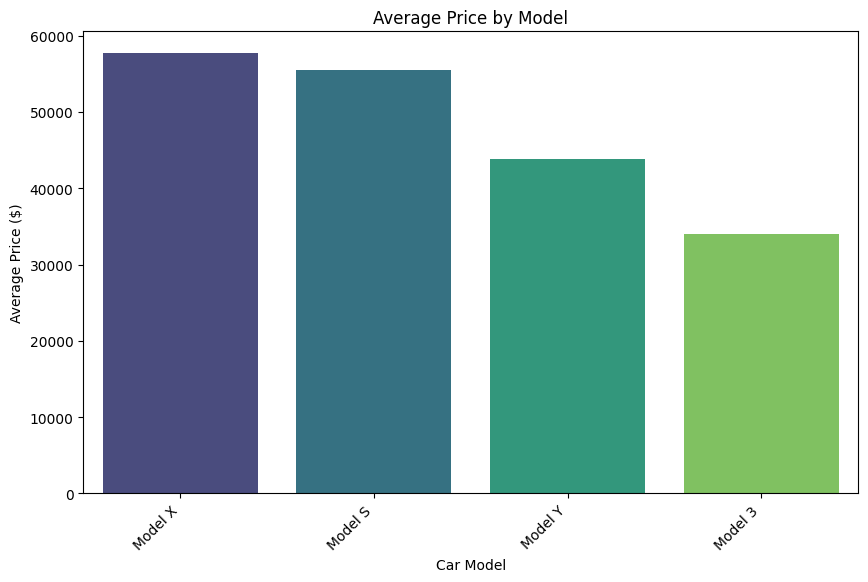

In [ ]:
avg_price_by_model = df.groupby('model')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_model.index, y=avg_price_by_model.values, palette='viridis')
plt.title('Average Price by Model')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Assuming your DataFrame is named df
paint_job_counts = df['paintJob'].value_counts()

# Define a custom color scale for better visual grouping
custom_colors = ['rgba(93, 164, 214, 0.8)', 'rgba(255, 144, 14, 0.8)', 'rgba(44, 160, 101, 0.8)', 'rgba(255, 65, 54, 0.8)']

# Plotting
fig = go.Figure(data=[go.Pie(labels=paint_job_counts.index, values=paint_job_counts.values, marker=dict(colors=custom_colors))])

# Create a 3D pie chart effect
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0.1, 0], hoverinfo='label+percent+value')

# Enhance visual grouping and hierarchy
fig.update_layout(title='Distribution of Paint Jobs', scene=dict(aspectmode="cube"))

# Show the plot
fig.show()

In [27]:
pip install seaborn matplotlib plotly

In [ ]:
import plotly.express as px

fig = px.scatter_3d(df2, x='odometer', y='price', z='year', color='model', size='price', hover_data=['model'])
fig.update_layout(title='3D Scatter Plot: Odometer, Price, and Year')
fig.show()

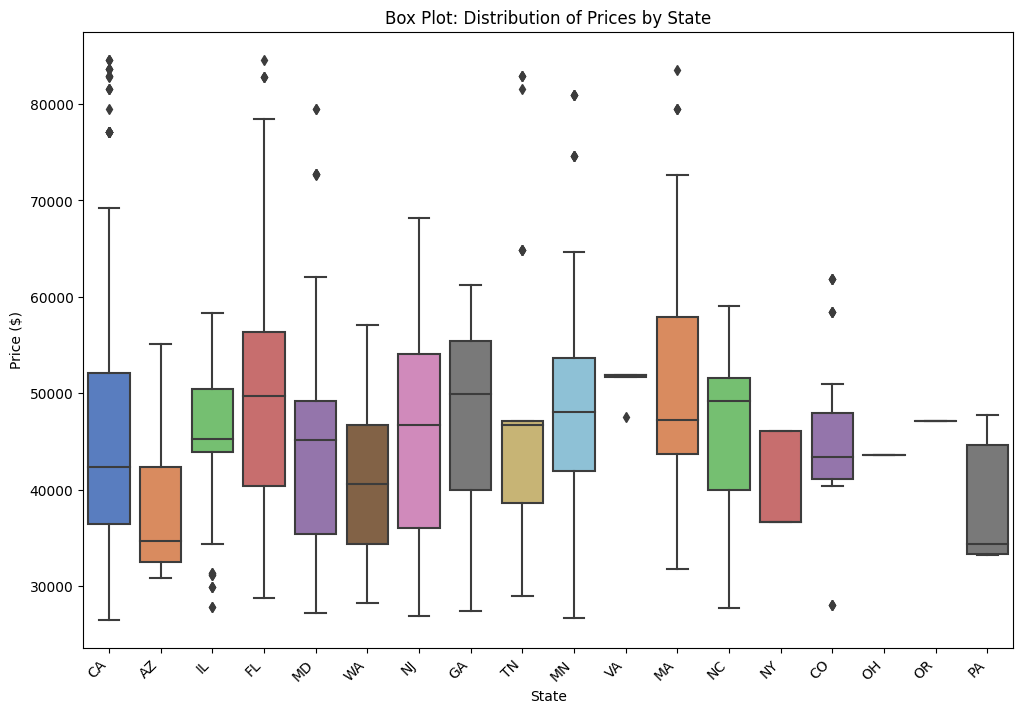

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='state', y='price', data=df, palette='muted')
plt.title('Box Plot: Distribution of Prices by State')
plt.xlabel('State')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named df
fig = px.scatter(
    df2,
    x='odometer',
    y='price',
    animation_frame='year',
    animation_group='model',
    size='price',
    color='state',
    hover_name='model',
    range_x=[df2['odometer'].min(), df2['odometer'].max()],
    range_y=[df2['price'].min(), df2['price'].max()],
    title='Animated Scatter Plot: Price vs Odometer',
    labels={'odometer': 'Odometer (miles)', 'price': 'Price ($)'},
    template='plotly_dark',
)

fig.show()
fig.write_html("animated_scatter_plot.html")

In [ ]:
import plotly.express as px

# Assuming your DataFrame is named df2
fig = px.bar(
    df2,
    x='state',
    y='price',
    animation_frame='year',
    title='Animated Bar Chart: Average Price Over the Years by State',
    labels={'price': 'Average Price ($)'},
    template='plotly_dark',
)

fig.show()

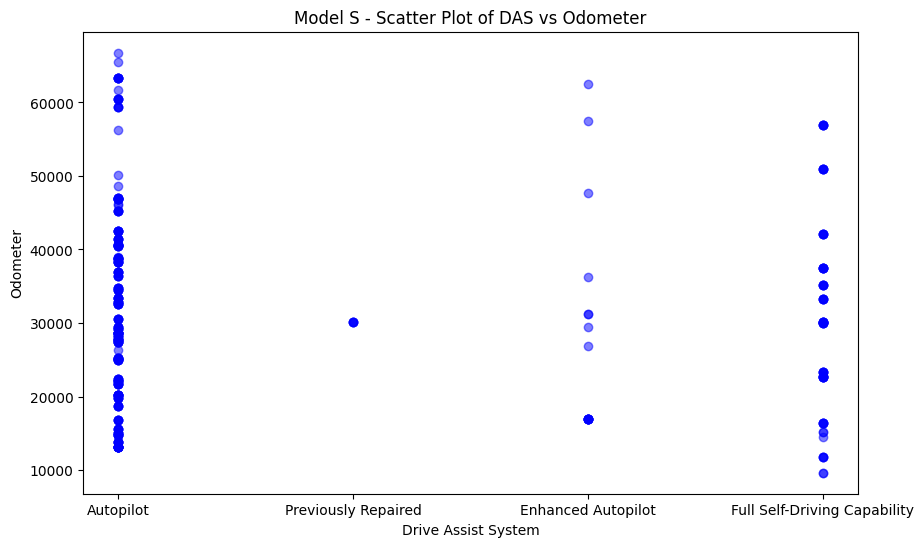

In [ ]:
# Assuming your DataFrame is named df
selected_model = 'Model S'
selected_data = df2[df2['model'] == selected_model]

# Set up the plot
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(selected_data['DAS'], selected_data['odometer'], alpha=0.5, color='blue')
plt.title(f'{selected_model} - Scatter Plot of DAS vs Odometer')
plt.xlabel('Drive Assist System')
plt.ylabel('Odometer')

plt.show()

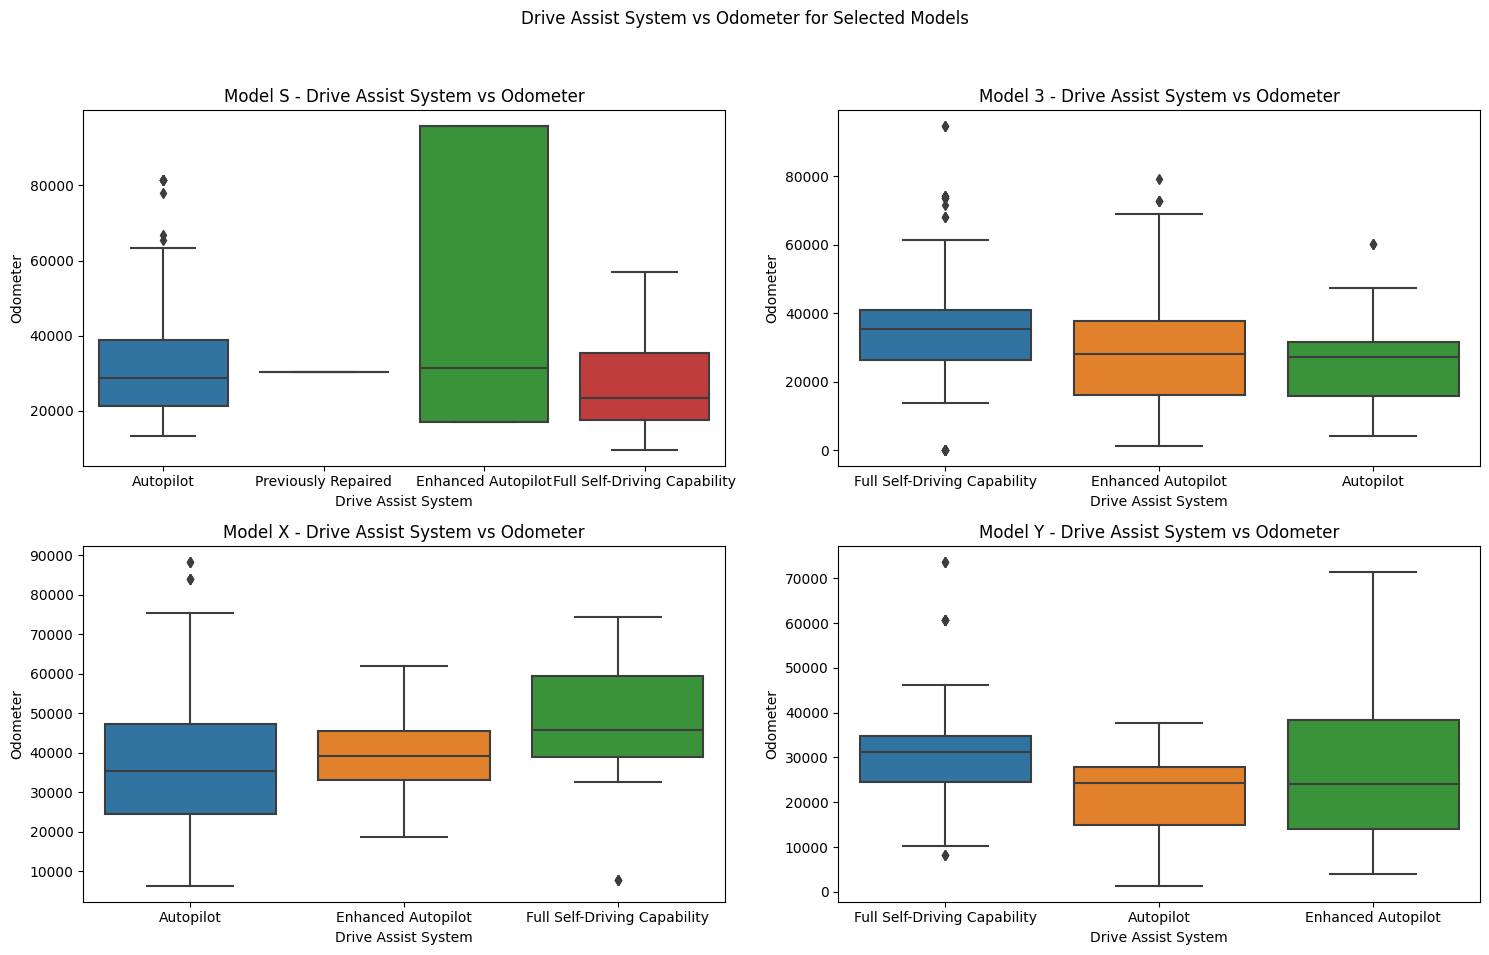

In [ ]:
# List of models to plot
selected_models = ['Model S', 'Model 3', 'Model X', 'Model Y']

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Drive Assist System vs Odometer for Selected Models')

# Plot for each model
for i, model in enumerate(selected_models):
    row = i // 2
    col = i % 2

    selected_data = df[df['model'] == model]

    # Plot DAS
    sns.boxplot(x='DAS', y='odometer', data=selected_data, ax=axes[row, col])
    axes[row, col].set_title(f'{model} - Drive Assist System vs Odometer')
    axes[row, col].set_xlabel('Drive Assist System')
    axes[row, col].set_ylabel('Odometer')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

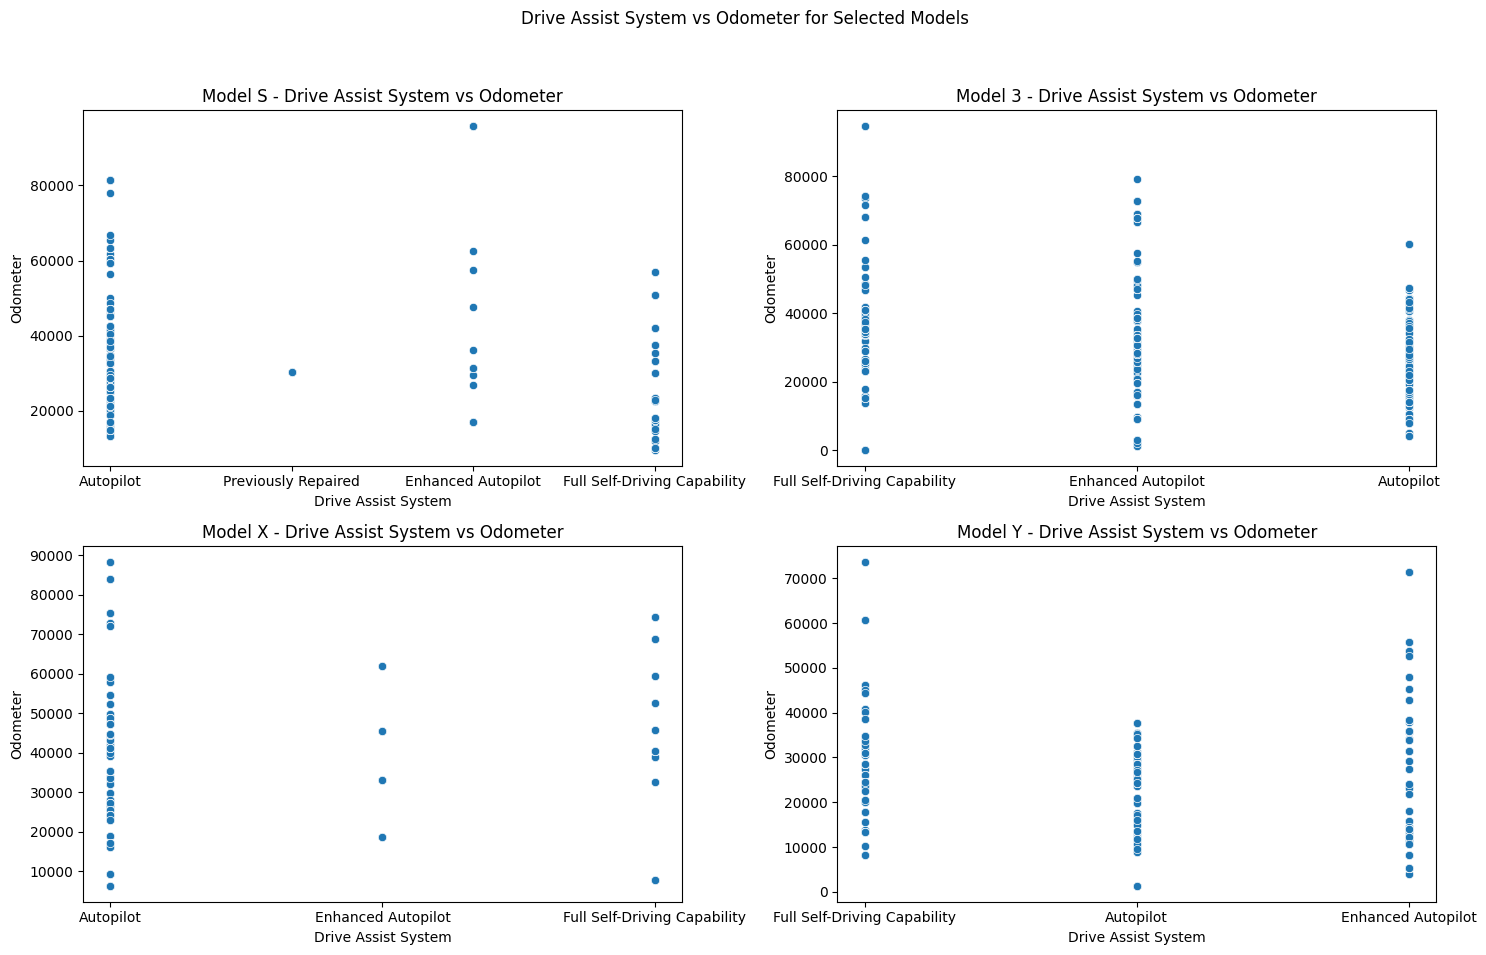

In [ ]:
# List of models to plot
selected_models = ['Model S', 'Model 3', 'Model X', 'Model Y']

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Drive Assist System vs Odometer for Selected Models')

# Plot for each model
for i, model in enumerate(selected_models):
    row = i // 2
    col = i % 2

    selected_data = df[df['model'] == model]

    # Plot DAS
    sns.scatterplot(x='DAS', y='odometer', data=selected_data, ax=axes[row, col])
    axes[row, col].set_title(f'{model} - Drive Assist System vs Odometer')
    axes[row, col].set_xlabel('Drive Assist System')
    axes[row, col].set_ylabel('Odometer')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


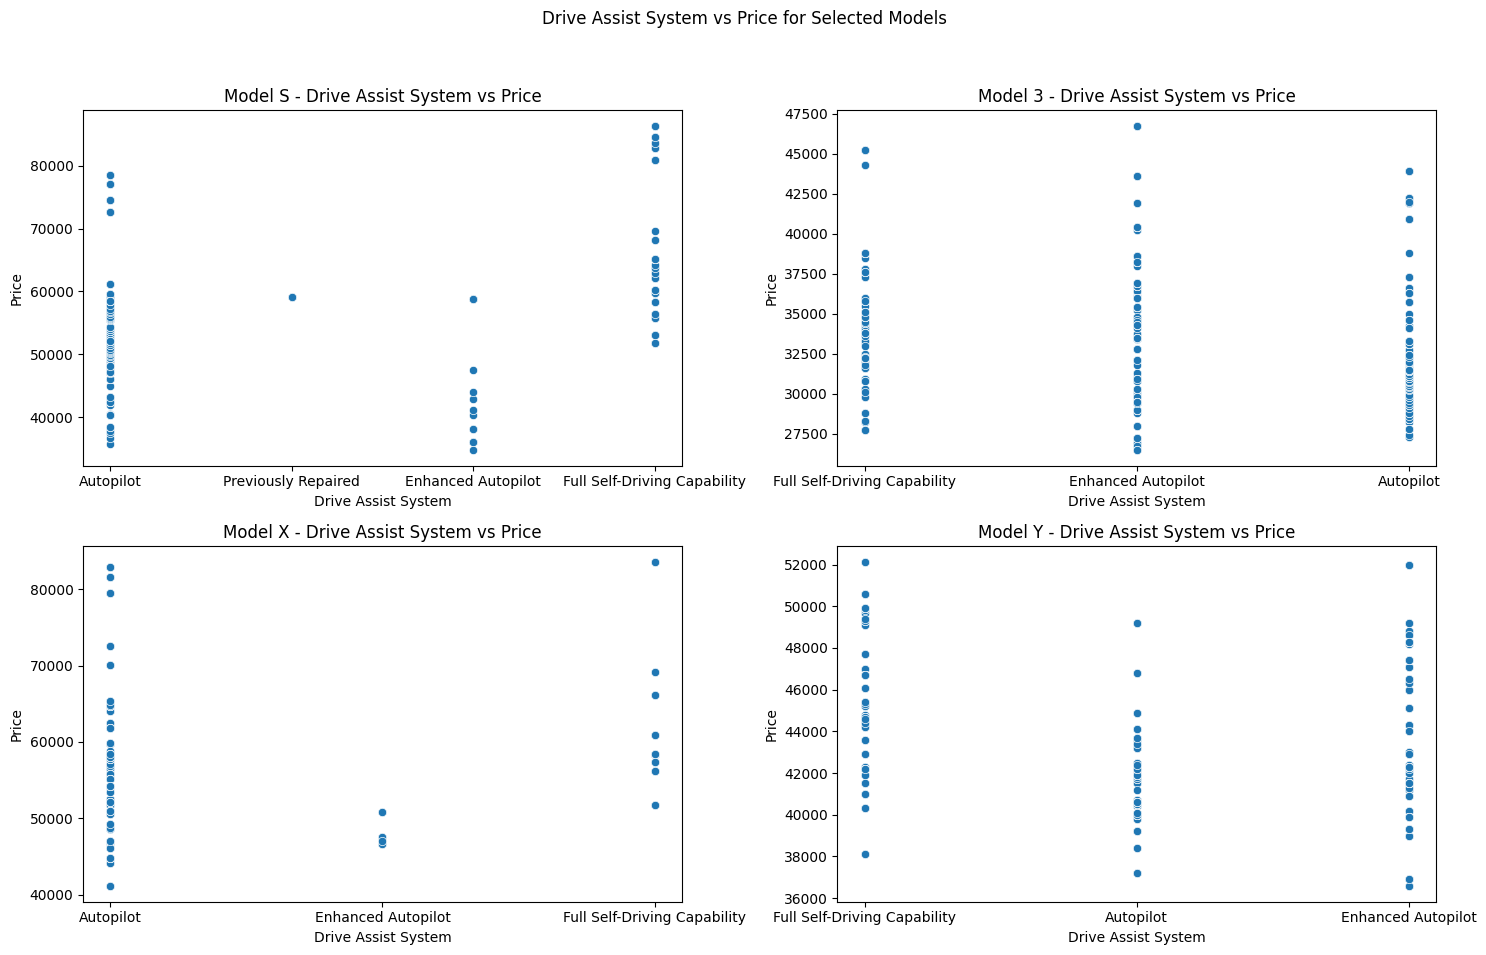

In [ ]:
# List of models to plot
selected_models = ['Model S', 'Model 3', 'Model X', 'Model Y']

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Drive Assist System vs Price for Selected Models')

# Plot for each model
for i, model in enumerate(selected_models):
    row = i // 2
    col = i % 2

    selected_data = df[df['model'] == model]

    # Plot DAS vs Price
    sns.scatterplot(x='DAS', y='price', data=selected_data, ax=axes[row, col])
    axes[row, col].set_title(f'{model} - Drive Assist System vs Price')
    axes[row, col].set_xlabel('Drive Assist System')
    axes[row, col].set_ylabel('Price')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

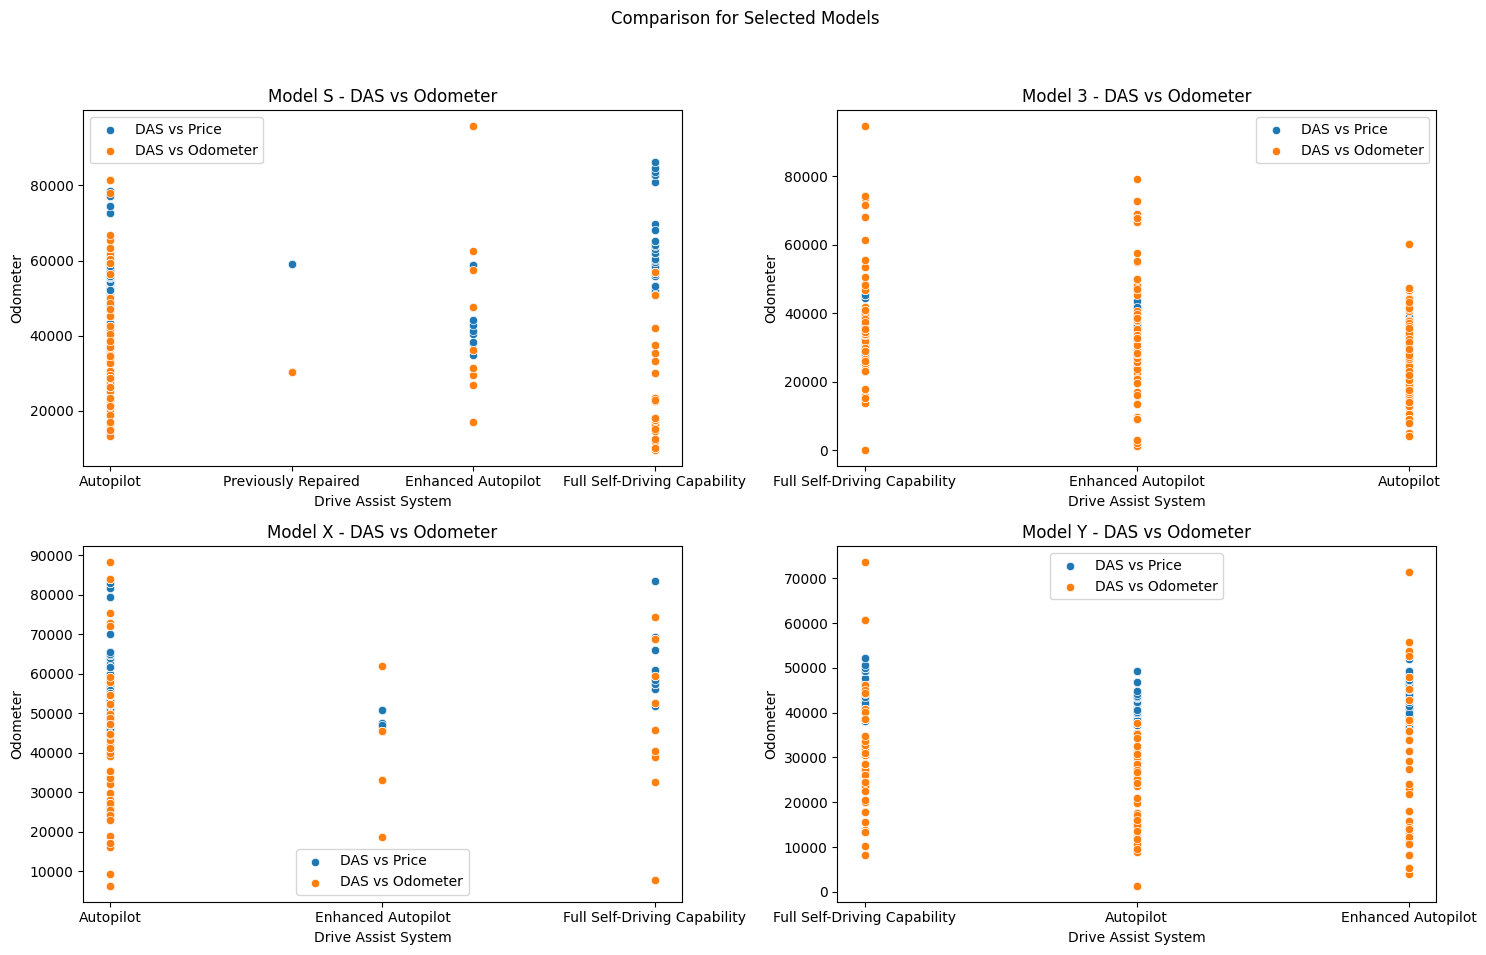

In [ ]:
# List of models to plot
selected_models = ['Model S', 'Model 3', 'Model X', 'Model Y']

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Comparison for Selected Models')

# Plot for each model
for i, model in enumerate(selected_models):
    row = i // 2
    col = i % 2

    selected_data = df[df['model'] == model]

    # Scatter plot for DAS vs Price
    sns.scatterplot(x='DAS', y='price', data=selected_data, ax=axes[row, col], label='DAS vs Price')
    axes[row, col].set_title(f'{model} - DAS vs Price')
    axes[row, col].set_xlabel('Drive Assist System')
    axes[row, col].set_ylabel('Price')

    # Scatter plot for DAS vs Odometer
    sns.scatterplot(x='DAS', y='odometer', data=selected_data, ax=axes[row, col], label='DAS vs Odometer')
    axes[row, col].set_title(f'{model} - DAS vs Odometer')
    axes[row, col].set_xlabel('Drive Assist System')
    axes[row, col].set_ylabel('Odometer')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend()
plt.show()


<ipython-input-47-697de3448e3f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-697de3448e3f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (2) than needed (4) and will cycle, whic

<Figure size 1600x1000 with 0 Axes>

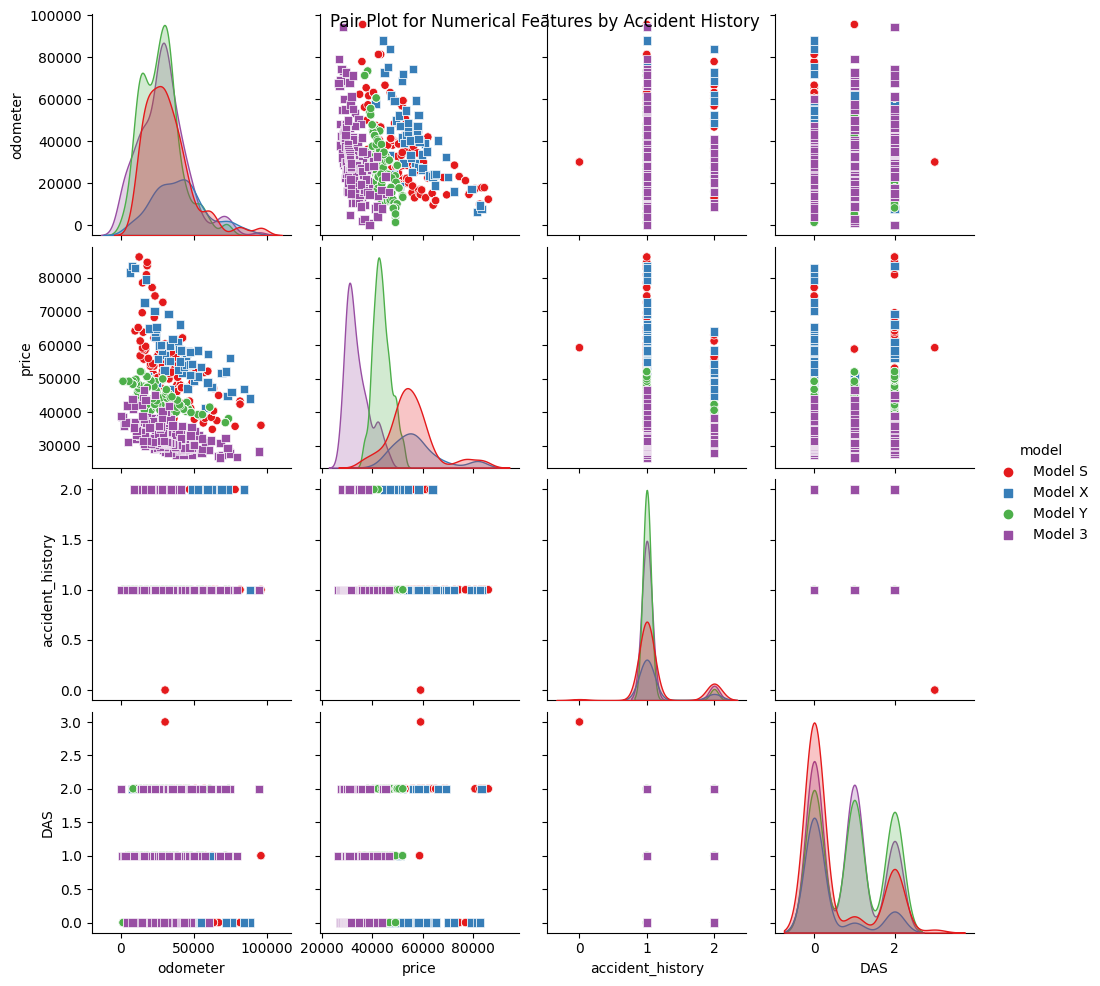

In [ ]:
# Select relevant numerical columns
numerical_cols = ['model', 'odometer', 'price']
numerical_df = df[numerical_cols]

# Add categorical columns for visualization
numerical_df['accident_history'] = df['accident_history'].astype('category').cat.codes
numerical_df['DAS'] = df['DAS'].astype('category').cat.codes

plt.figure(figsize=(16, 10))
sns.pairplot(numerical_df, hue='model', markers=["o", "s"], palette='Set1')
plt.suptitle('Pair Plot for Numerical Features by Accident History')
plt.show()

In [ ]:
df3 = df2.groupby(['model','state'])['price'].mean().reset_index()

fig = px.choropleth(df3,
                    locations='state',
                    locationmode="USA-states",
                    color='price',
                    scope="usa",
                    hover_data=['model', 'price'],
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(title_text='Average Price Per State Per Model',
                  geo_scope='usa')

fig.show()
fig.write_html("choropleth_map.html")

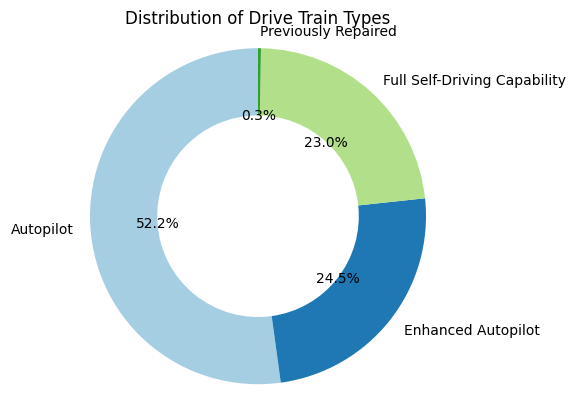

In [ ]:
drive_train_counts = df2['DAS'].value_counts()
labels = drive_train_counts.index
sizes = drive_train_counts.values

# Plotting
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=plt.cm.Paired.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Drive Train Types')
plt.show()